In [ ]:
import os
import tarfile
from pathlib import Path

# Upload lfw-funneled.tgz manually to Colab or use drive
dataset_path = "/content/lfw-funneled.tgz"
extract_path = "/content/lfw_dataset"

# Extract the dataset
if not os.path.exists(extract_path):
    with tarfile.open(dataset_path, "r:gz") as tar:
        tar.extractall(path=extract_path)

print(f"Dataset extracted to: {extract_path}")


Dataset extracted to: /content/lfw_dataset


In [ ]:
def load_images(image_dir, image_size=(160, 160)):
    X, y = [], []
    full_dir = Path(image_dir, "lfw_funneled")
    print(f"Checking directory: {full_dir}")

    for person_dir in full_dir.iterdir():
        if person_dir.is_dir():
            label = person_dir.name
            for img_path in person_dir.glob("*.jpg"):
                img = cv2.imread(str(img_path))
                if img is None:
                    continue
                img = cv2.resize(img, image_size)
                X.append(img_to_array(img))
                y.append(label)
    return np.array(X), np.array(y)


In [ ]:
!pip install scikit-image opencv-python
import os
import tarfile
from pathlib import Path
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, hog
from keras.utils import img_to_array
from sklearn.model_selection import train_test_split

# Upload lfw-funneled.tgz manually to Colab or use drive
dataset_path = "/content/lfw-funneled.tgz"
extract_path = "/content/lfw_dataset"

# Extract the dataset
if not os.path.exists(extract_path):
    with tarfile.open(dataset_path, "r:gz") as tar:
        tar.extractall(path=extract_path)

print(f"Dataset extracted to: {extract_path}")

def load_images(image_dir, image_size=(160, 160)):
    X, y = [], []
    full_dir = Path(image_dir, "lfw_funneled")
    print(f"Checking directory: {full_dir}")

    for person_dir in full_dir.iterdir():
        if person_dir.is_dir():
            label = person_dir.name
            for img_path in person_dir.glob("*.jpg"):
                img = cv2.imread(str(img_path))
                if img is None:
                    continue
                img = cv2.resize(img, image_size)
                X.append(img_to_array(img))
                y.append(label)
    return np.array(X), np.array(y)

# Load the dataset
X, y = load_images(extract_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def extract_lbp(image):
    gray = cv2.cvtColor(image.astype('uint8'), cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1.0, method='uniform')
    return lbp.flatten()

def extract_hog(image):
    gray = cv2.cvtColor(image.astype('uint8'), cv2.COLOR_RGB2GRAY)
    hog_features, _ = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_features

def fuse_features(images):
    features = []
    for img in images:
        hog_f = extract_hog(img)
        lbp_f = extract_lbp(img)
        fused = np.concatenate([hog_f, lbp_f])
        features.append(fused)
    return np.array(features)

# Extract features and fuse them
X_train_fused = fuse_features(X_train)
X_test_fused = fuse_features(X_test)

Dataset extracted to: /content/lfw_dataset
Checking directory: /content/lfw_dataset/lfw_funneled


In [ ]:
!pip install keras-vggface keras-applications --upgrade

In [ ]:
!pip install keras==2.11.0 #Downgrade keras to a compatible version
!pip install keras_vggface --no-deps #Install keras_vggface without automatically installing dependencies

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.


In [ ]:
!pip install keras==2.11.0 #Downgrade keras to a compatible version
!pip install keras_vggface --no-deps #Install keras_vggface without automatically installing dependencies

In [ ]:
!pip install tensorflow==2.11.0
!pip install keras==2.11.0
!pip install keras_vggface

ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [ ]:
!pip uninstall -y keras keras-nightly keras-Preprocessing keras-vis
!pip install keras==2.11
!pip install keras-vggface keras-applications
import os
os.kill(os.getpid(), 9)  # Restart runtime


Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
  Using cached keras-2.11.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.


In [ ]:
!pip install facenet-pytorch




In [ ]:
from facenet_pytorch import InceptionResnetV1
import torch
from torchvision import transforms
from PIL import Image

# Load pretrained FaceNet
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
facenet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Preprocessing for FaceNet
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

def get_facenet_embeddings(images):
    embeddings = []
    for img in images:
        img_t = transform(img.astype(np.uint8)).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = facenet(img_t).cpu().numpy().flatten()
        embeddings.append(embedding)
    return np.array(embeddings)


  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
from collections import Counter

# Count each label's occurrences
label_counts = Counter(y)

# Keep only labels with at least 2 images
valid_labels = {label for label, count in label_counts.items() if count >= 2}

# Filter images and labels
X_filtered = []
y_filtered = []
for img, label in zip(X, y):
    if label in valid_labels:
        X_filtered.append(img)
        y_filtered.append(label)

X_filtered = np.array(X_filtered)
y_filtered = np.array(y_filtered)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print(f"Filtered dataset: {len(X_filtered)} images from {len(set(y_filtered))} people.")


Filtered dataset: 677 images from 39 people.


In [ ]:
import os
import cv2
import numpy as np
from pathlib import Path
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def load_images_filtered(image_dir, image_size=(160, 160), min_images_per_class=2):
    X, y = [], []
    full_dir = Path(image_dir, "lfw_funneled")

    label_image_map = defaultdict(list)

    # First collect all images and group by label
    for person_dir in full_dir.iterdir():
        if person_dir.is_dir():
            label = person_dir.name
            images = list(person_dir.glob("*.jpg"))
            if len(images) >= min_images_per_class:
                for img_path in images:
                    img = cv2.imread(str(img_path))
                    if img is None:
                        continue
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, image_size)
                    X.append(np.array(img))
                    y.append(label)

    return np.array(X), np.array(y)

# Load images (only people with >= 2 images)
X, y = load_images_filtered("/content/lfw_dataset", min_images_per_class=2)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print(f"Loaded {len(X)} images from {len(le.classes_)} people (each with ≥2 images).")


Loaded 677 images from 39 people (each with ≥2 images).


In [ ]:
from facenet_pytorch import InceptionResnetV1
import torch
from torchvision import transforms

# Load FaceNet
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
facenet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

def get_facenet_embeddings(images):
    embeddings = []
    for img in images:
        img_t = transform(img.astype(np.uint8)).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = facenet(img_t).cpu().numpy().flatten()
        embeddings.append(emb)
    return np.array(embeddings)

# Extract FaceNet features
X_train_deep = get_facenet_embeddings(X_train)
X_test_deep = get_facenet_embeddings(X_test)


In [ ]:
from skimage.feature import local_binary_pattern, hog

def extract_lbp_hog_features(images):
    features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # LBP
        lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)

        # HOG
        hog_feat = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

        # Combine LBP + HOG
        combined = np.hstack((lbp_hist, hog_feat))
        features.append(combined)
    return np.array(features)

X_train_traditional = extract_lbp_hog_features(X_train)
X_test_traditional = extract_lbp_hog_features(X_test)


In [ ]:
# Fuse Deep + Traditional features
X_train_combined = np.hstack((X_train_deep, X_train_traditional))
X_test_combined = np.hstack((X_test_deep, X_test_traditional))


In [ ]:
from sklearn.svm import SVC

# SVM Classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_combined, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = clf.predict(X_test_combined)

# Metrics with zero_division=1 to avoid undefined precision
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7132352941176471

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         1
           5       1.00      0.00      0.00         1
           8       1.00      0.00      0.00         3
          10       1.00      0.00      0.00         1
          11       1.00      0.00      0.00         3
          12       0.64      1.00      0.78        56
          13       0.76      1.00      0.86        22
          14       1.00      1.00      1.00         9
          15       1.00      0.00      0.00         3
          17       1.00      0.00      0.00         1
          19       1.00      0.50      0.67         4
          20       1.00      0.00      0.00         1
          22       1.00      0.50      0.67         4
          23       1.00      0.00      0.00         1
          24       1.00    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_combined, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_combined)

# Metrics
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest - Accuracy: 0.8529411764705882

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.00      0.00         1
           5       1.00      0.00      0.00         1
           8       0.50      0.67      0.57         3
          10       1.00      0.00      0.00         1
          11       1.00      0.33      0.50         3
          12       0.85      1.00      0.92        56
          13       0.79      1.00      0.88        22
          14       0.90      1.00      0.95         9
          15       1.00      0.67      0.80         3
          17       1.00      0.00      0.00         1
          19       1.00      1.00      1.00         4
          20       1.00      0.00      0.00         1
          22       1.00      1.00      1.00         4
          23       1.00      0.00      0.00         1
          2

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_combined, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test_combined)

# Metrics
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9191176470588235

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           8       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         1
          11       1.00      0.67      0.80         3
          12       0.96      0.98      0.97        56
          13       0.88      1.00      0.94        22
          14       1.00      1.00      1.00         9
          15       1.00      0.67      0.80         3
          17       1.00      0.00      0.00         1
          19       0.80      1.00      0.89         4
          20       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         4
          23       1.00      1.00      1.00         1
          24     

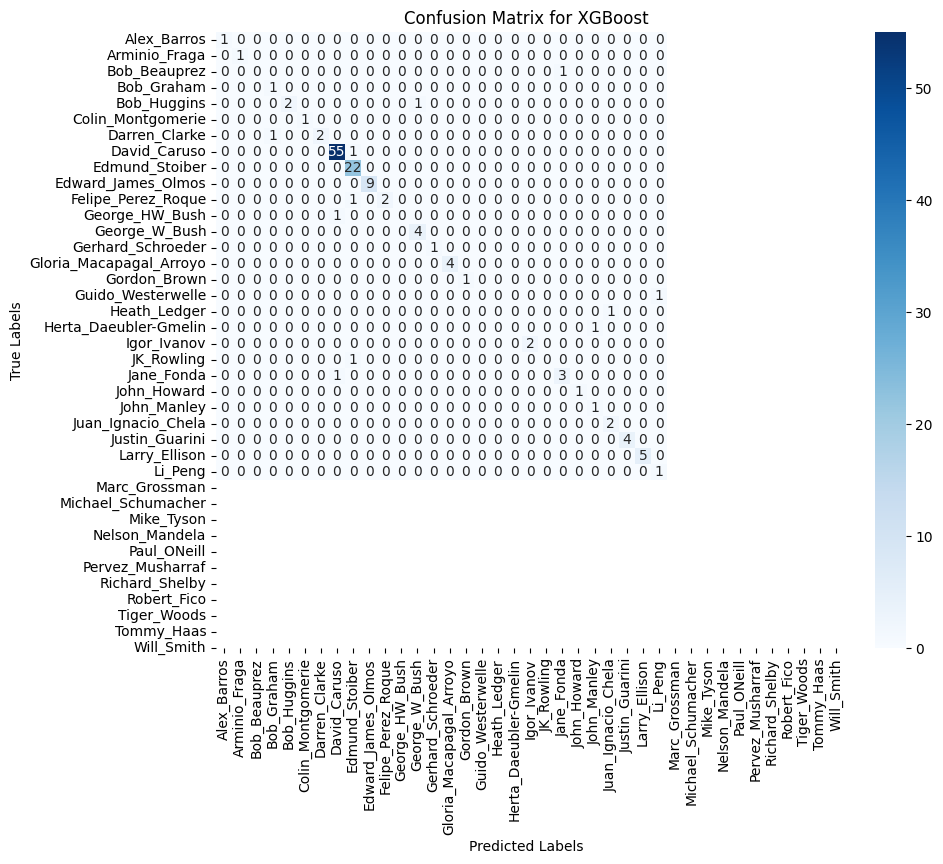

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


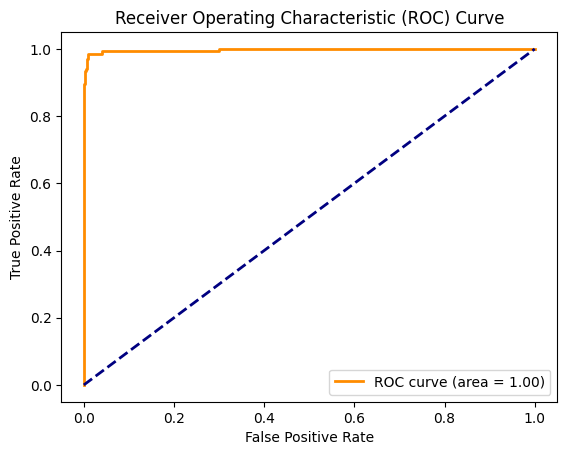

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import xgboost as xgb
from xgboost import XGBClassifier


# Binarize the labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))

# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_combined, y_train) # Fit the model before predicting

# Get ROC curve for each class
# Use xgb_clf instead of best_xgb_model
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), xgb_clf.predict_proba(X_test_combined).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

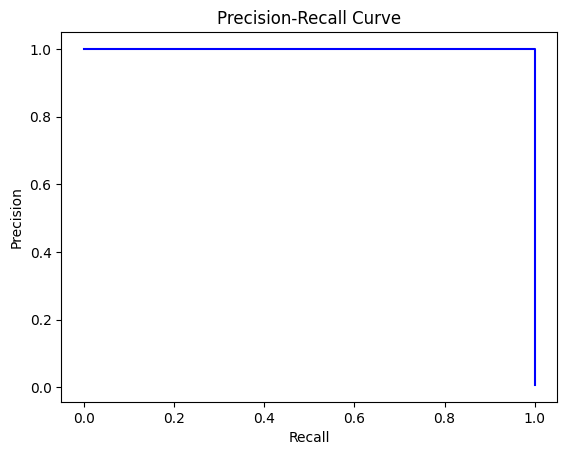

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier

# Precision-Recall curve for one class (e.g., class 1)
precision, recall, _ = precision_recall_curve(y_test_bin[:, 1], xgb_clf.predict_proba(X_test_combined)[:, 1])

plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Deployment & Optimization

In [ ]:
import joblib
from sklearn.decomposition import PCA

# want to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on your training data (e.g., X_train_combined)
pca.fit(X_train_combined)

# Save trained SVM model
joblib.dump(clf, "svm_face_recognition.pkl")

# Save PCA transformer
joblib.dump(pca, "pca_transform.pkl")

['pca_transform.pkl']

In [ ]:
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.2 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.
tens

In [ ]:
!pip uninstall -y keras tensorflow
!pip install tensorflow==2.11.0
!pip install keras==2.11.0

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0
  Using cached keras-2.11.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [ ]:
!pip uninstall keras -y


Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0


In [ ]:
import os
os.kill(os.getpid(), 9)


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 840.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

Autoencoder for Deepfake Detection

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(50, 37, 1))  # example shape, adjust to your image size
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
# Adjusted padding and strides in UpSampling2D & Conv2D to maintain size
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)  # <-- fixed
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
images = lfw_people.images
images = images / 255.0  # normalize
images = images.reshape(-1, 50, 37, 1)  # reshape to match autoencoder input


Visualize Reconstruction vs. Original

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


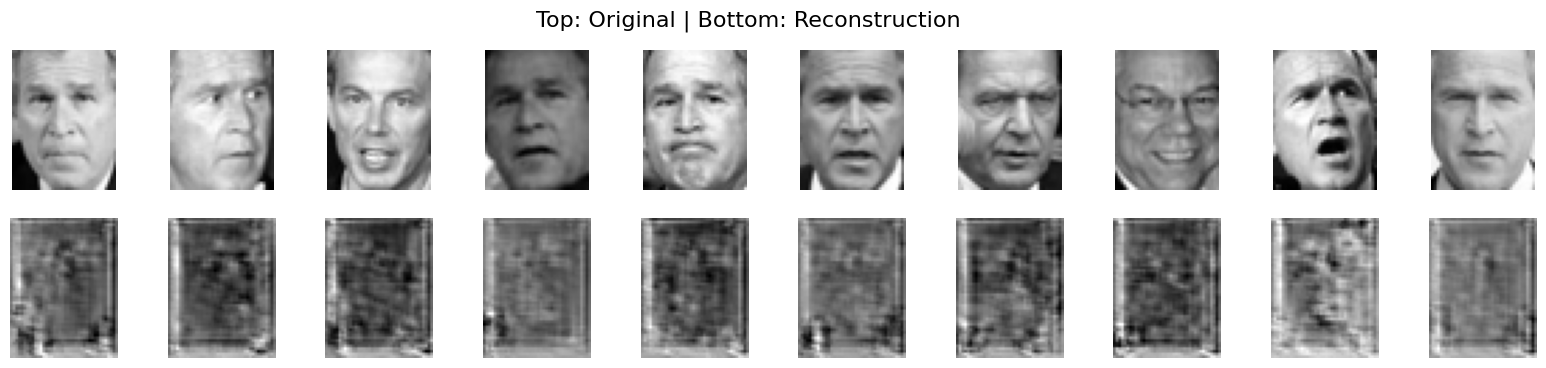

In [ ]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test[:10])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(50, 37), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    # Reshape to (52, 40) instead of (50, 37)
    plt.imshow(decoded_imgs[i].reshape(52, 40), cmap='gray')
    plt.axis('off')
plt.suptitle("Top: Original | Bottom: Reconstruction", fontsize=16)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


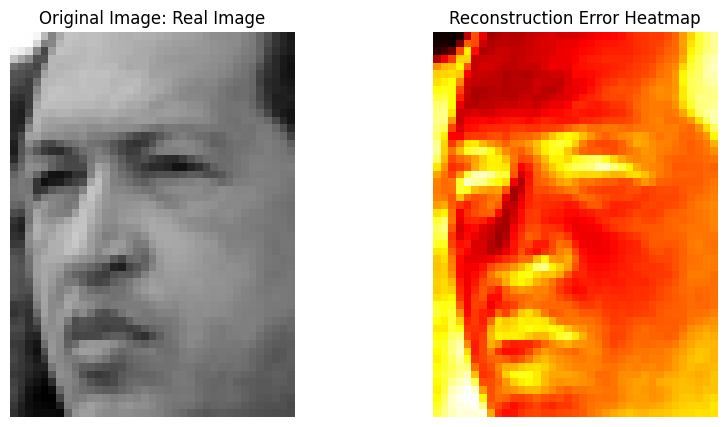

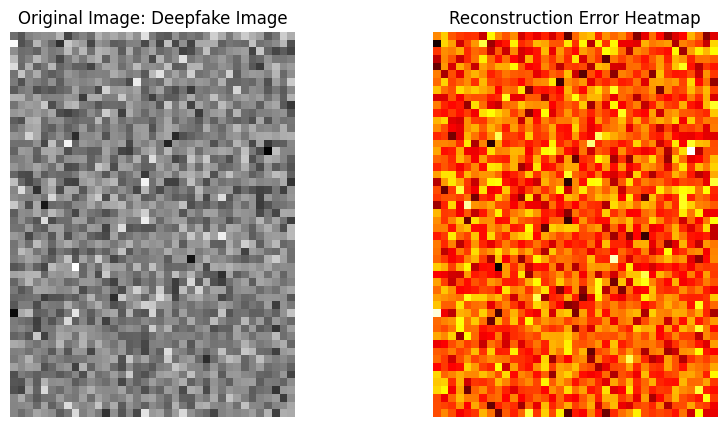

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_heatmap(original_image, reconstructed_image):
    # Resize the reconstructed image to match the original image shape
    reconstructed_image = reconstructed_image[:, :original_image.shape[1], :]

    # Calculate the absolute difference between the original and the resized reconstructed image
    diff = np.abs(original_image - reconstructed_image)
    diff = np.mean(diff, axis=-1)  # Average across RGB channels to get a single channel heatmap

    # Normalize to [0, 1]
    diff = diff / np.max(diff)
    return diff

# Assume 'images' from previous cell is the real images
real_image = images[:10]  # Select 10 images as real images for demonstration
real_reconstructed = autoencoder.predict(real_image)  # Reconstruct real images using autoencoder

# Create synthetic deepfake images by adding noise (for demonstration)
# In a real scenario, you would use your actual deepfake images here
deepfake_image = real_image + np.random.normal(0, 0.1, real_image.shape)
deepfake_reconstructed = autoencoder.predict(deepfake_image)

# Visualize the heatmap
def plot_image_with_heatmap(image, heatmap, title=''):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image[0].reshape(50, 37), cmap='gray')  # Show the original image
    plt.title('Original Image: ' + title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(heatmap, cmap='hot')  # Show the heatmap
    plt.title('Reconstruction Error Heatmap')
    plt.axis('off')

    plt.show()

# Plot for real and deepfake images
plot_image_with_heatmap(real_image, generate_heatmap(real_image[0], real_reconstructed[0]), 'Real Image')
plot_image_with_heatmap(deepfake_image, generate_heatmap(deepfake_image[0], deepfake_reconstructed[0]), 'Deepfake Image')

In [ ]:
def get_reconstruction_error(original_image, reconstructed_image):
    # Resize the reconstructed image to match the original image shape before flattening
    reconstructed_image = reconstructed_image[:, :original_image.shape[1], :original_image.shape[2]]
    # Sliced along both dimensions to match original image shape

    # Flatten both images and compute mean squared error
    from sklearn.metrics import mean_squared_error  # Import mean_squared_error here
    return mean_squared_error(original_image.flatten(), reconstructed_image.flatten())

# Calculate reconstruction error for both real and deepfake images
real_error = get_reconstruction_error(real_image, real_reconstructed)
deepfake_error = get_reconstruction_error(deepfake_image, deepfake_reconstructed)

print("Reconstruction error for real image:", real_error)
print("Reconstruction error for deepfake image:", deepfake_error)

Reconstruction error for real image: 0.24808216094970703
Reconstruction error for deepfake image: 0.2637921103552475


 Enhanced Feature Extraction Pipeline

In [ ]:
from skimage.feature import local_binary_pattern, hog
from skimage.transform import pyramid_gaussian
import cv2
import numpy as np

def extract_enhanced_features(images):
    features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Multi-scale LBP
        radii = [1, 2, 3]
        n_points = [8, 16, 24]
        lbp_features = []
        for radius, n_point in zip(radii, n_points):
            lbp = local_binary_pattern(gray, n_point, radius, method='uniform')
            hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_point + 3), range=(0, n_point + 2))
            lbp_features.extend(hist)

        # Multi-scale HOG
        hog_features = []
        for scale in np.linspace(0.5, 1.5, 3):
            resized = cv2.resize(gray, (0,0), fx=scale, fy=scale)
            fd = hog(resized, orientations=9, pixels_per_cell=(8,8),
                    cells_per_block=(2,2), transform_sqrt=True, feature_vector=True)
            hog_features.extend(fd)

        # Gabor features
        gabor_features = []
        kernels = []
        for theta in np.arange(0, np.pi, np.pi/4):
            for sigma in (1, 3):
                for frequency in (0.05, 0.25):
                    kernel = cv2.getGaborKernel((21,21), sigma, theta, frequency, 0.5, 0, ktype=cv2.CV_32F)
                    kernels.append(kernel)

        for kernel in kernels:
            filtered = cv2.filter2D(gray, cv2.CV_8UC3, kernel)
            gabor_features.extend([filtered.mean(), filtered.std()])

        # Combine all features
        combined = np.hstack([lbp_features, hog_features, gabor_features])
        features.append(combined)

    return np.array(features)

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import transforms

# Initialize MTCNN for face detection and alignment
mtcnn = MTCNN(keep_all=True, device='cuda:0' if torch.cuda.is_available() else 'cpu')
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(mtcnn.device)

def get_aligned_facenet_embeddings(images):
    embeddings = []
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((160, 160)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    for img in images:
        # Detect and align faces
        faces = mtcnn(img)
        if faces is not None:
            # Get embeddings for each detected face
            face_embedding = resnet(faces.unsqueeze(0)).detach().cpu().numpy().flatten()
            embeddings.append(face_embedding)
        else:
            # Fallback to center crop if no face detected
            img_t = transform(img).unsqueeze(0).to(mtcnn.device)
            with torch.no_grad():
                embedding = resnet(img_t).cpu().numpy().flatten()
            embeddings.append(embedding)

    return np.array(embeddings)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

def train_advanced_classifier(X_train, y_train, X_test, y_test):
    # Base models
    svm = SVC(probability=True)
    rf = RandomForestClassifier()
    xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

    # Hyperparameter grids
    param_grid_svm = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['linear', 'rbf']
    }

    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    param_grid_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    # Grid search for best parameters
    grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, n_jobs=-1, verbose=1)
    grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, n_jobs=-1, verbose=1)
    grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, n_jobs=-1, verbose=1)

    grid_svm.fit(X_train, y_train)
    grid_rf.fit(X_train, y_train)
    grid_xgb.fit(X_train, y_train)

    # Stacking classifier with best estimators
    estimators = [
        ('svm', grid_svm.best_estimator_),
        ('rf', grid_rf.best_estimator_),
        ('xgb', grid_xgb.best_estimator_)
    ]

    stack_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=XGBClassifier(),
        stack_method='predict_proba',
        n_jobs=-1
    )

    stack_clf.fit(X_train, y_train)

    # Evaluation
    y_pred = stack_clf.predict(X_test)
    print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return stack_clf

In [ ]:
import cv2
from PIL import Image
import numpy as np

def real_time_face_recognition(model, facenet_model, mtcnn, label_encoder):
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces
        boxes, _ = mtcnn.detect(rgb_frame)

        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = map(int, box)
                face = rgb_frame[y1:y2, x1:x2]

                # Get embedding
                face_img = Image.fromarray(face)
                face_tensor = mtcnn(face_img)
                if face_tensor is not None:
                    embedding = facenet_model(face_tensor.unsqueeze(0)).detach().cpu().numpy()

                    # Extract traditional features
                    traditional_features = extract_enhanced_features([face])

                    # Combine features
                    combined_features = np.hstack([embedding.flatten(), traditional_features[0]])

                    # Predict
                    pred = model.predict([combined_features])[0]
                    proba = model.predict_proba([combined_features])[0]
                    confidence = np.max(proba)

                    if confidence > 0.7:  # Confidence threshold
                        name = label_encoder.inverse_transform([pred])[0]
                        cv2.putText(frame, f"{name} ({confidence:.2f})", (x1, y1-10),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
                        cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
                    else:
                        cv2.putText(frame, "Unknown", (x1, y1-10),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
                        cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)

        cv2.imshow('Face Recognition', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
from albumentations import (
    Compose, RandomBrightnessContrast, HorizontalFlip,
    Rotate, GaussNoise, OpticalDistortion
)

augmentation = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.2),
    Rotate(limit=20, p=0.3),
    GaussNoise(var_limit=(10.0, 50.0), p=0.2),
    OpticalDistortion(p=0.3)
])

def augment_image(image):
    augmented = augmentation(image=image)['image']
    return augmented

<ipython-input-40-327c11c86603>:10: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  GaussNoise(var_limit=(10.0, 50.0), p=0.2),


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model

def build_siamese_model(input_shape, embedding_size=128):
    # Shared embedding network
    input_layer = Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(input_layer)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(embedding_size, activation=None)(x)
    x = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(x)

    return Model(input_layer, x)

def triplet_loss(y_true, y_pred, alpha=0.2):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)

    basic_loss = pos_dist - neg_dist + alpha
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0.0))

    return loss

In [ ]:
def predict_with_confidence(model, X_test, threshold=0.7):
    probas = model.predict_proba(X_test)
    max_proba = np.max(probas, axis=1)
    preds = np.where(max_proba > threshold,
                    model.predict(X_test),
                    -1)  # -1 for unknown
    return preds

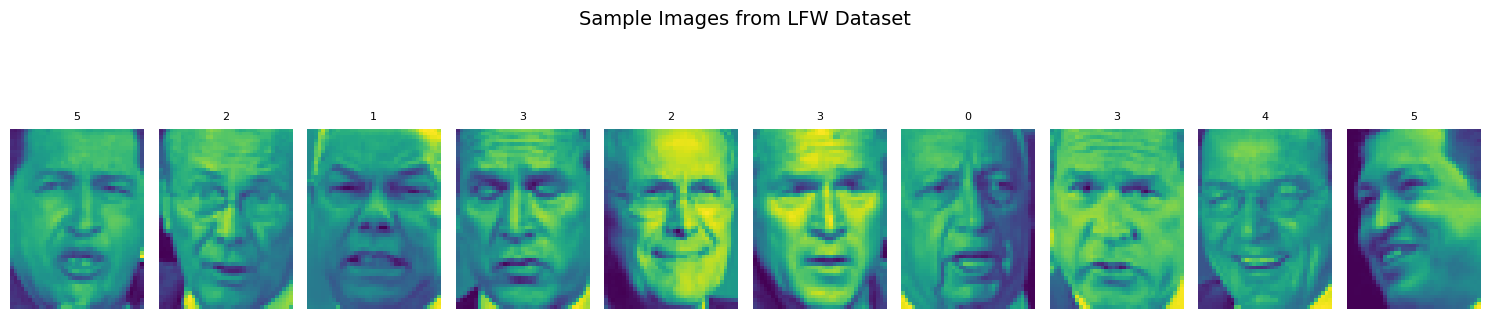

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random

def plot_sample_faces(images, labels, num_samples=10):
    plt.figure(figsize=(15, 4))
    indices = random.sample(range(len(images)), num_samples)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        img = images[idx]
        if img.max() <= 1.0:
            img = (img * 255).astype('uint8')  # Rescale if normalized
        else:
            img = img.astype('uint8')
        plt.imshow(img)
        plt.title(labels[idx], fontsize=8)
        plt.axis('off')
    plt.suptitle("Sample Images from LFW Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()

plot_sample_faces(X_train, y_train)


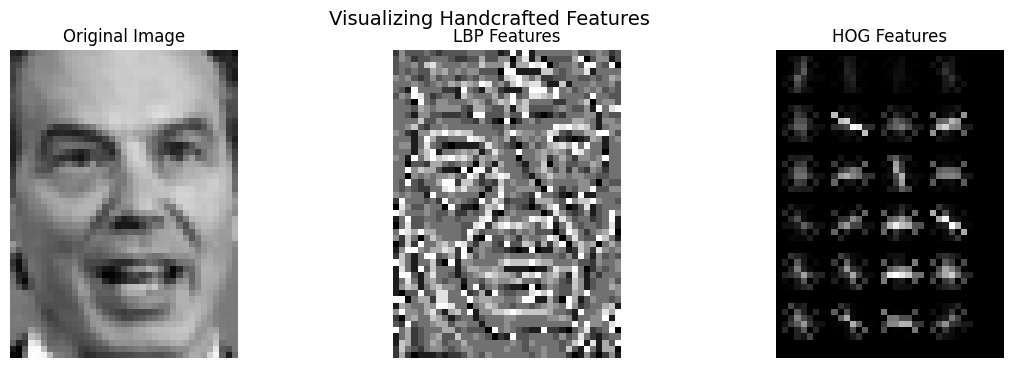

In [ ]:
def visualize_lbp_hog(image):
    img = image.copy()
    if img.max() <= 1.0:
        img = (img * 255).astype('uint8')
    else:
        img = img.astype('uint8')

    # The image is already grayscale, so no need for conversion
    gray = img
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Remove this line

    # LBP
    lbp = local_binary_pattern(gray, P=8, R=1.0, method='uniform')

    # HOG
    hog_features, hog_image = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                   visualize=True, feature_vector=True)

    fig, ax = plt.subplots(1, 3, figsize=(14, 4))
    ax[0].imshow(img, cmap='gray')  # Display in grayscale
    ax[0].set_title("Original Image")
    ax[1].imshow(lbp, cmap='gray')
    ax[1].set_title("LBP Features")
    ax[2].imshow(hog_image, cmap='gray')
    ax[2].set_title("HOG Features")
    for a in ax:
        a.axis('off')
    plt.suptitle("Visualizing Handcrafted Features", fontsize=14)
    plt.show()

# Use a random sample image from training set
visualize_lbp_hog(random.choice(X_train))